Машины опорных векторов (сокращенно SVM) — это контролируемые алгоритмы машинного обучения, которые используются для целей классификации и регрессии. В этом задании вам необходимо обучить Support Vector Machines для классификации пульсаров. 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

**1. Прочитайте данные, сделайте беглый EDA - посмотрите на кол-во данных, названия столбцов, нет ли в них ошибок, переименуйте для более удобной работы, есть ли пропущенные значения. Посмотрите нет ли дисбаланса классов по таргету? Сделайте саммари по признакам. Отобразите боксплоты признаков, чтобы оценить выбросы в данных. Постройте гистограммы признаков, чтобы взглянуть на распределение данных.**

In [2]:
df = pd.read_csv('pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [4]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [44]:
colu = ['mean_ip',
       'standard_ip',
       'excess_ip',
       'skewness_ip', 'mean_DM_SNR',
       'standard_DM_SNR',
       'exces_DM_SNR', 'skewness_DM_SNR',
       'target_class']
df.columns = colu
df['target_class'].value_counts()  

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [45]:
df.describe()

,mean_ip,standard_ip,excess_ip,skewness_ip,mean_DM_SNR,standard_DM_SNR,exces_DM_SNR,skewness_DM_SNR,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [46]:
for col in df:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True)


In [47]:
df.isnull().sum()

mean_ip            0
standard_ip        0
excess_ip          0
skewness_ip        0
mean_DM_SNR        0
standard_DM_SNR    0
exces_DM_SNR       0
skewness_DM_SNR    0
target_class       0
dtype: int64

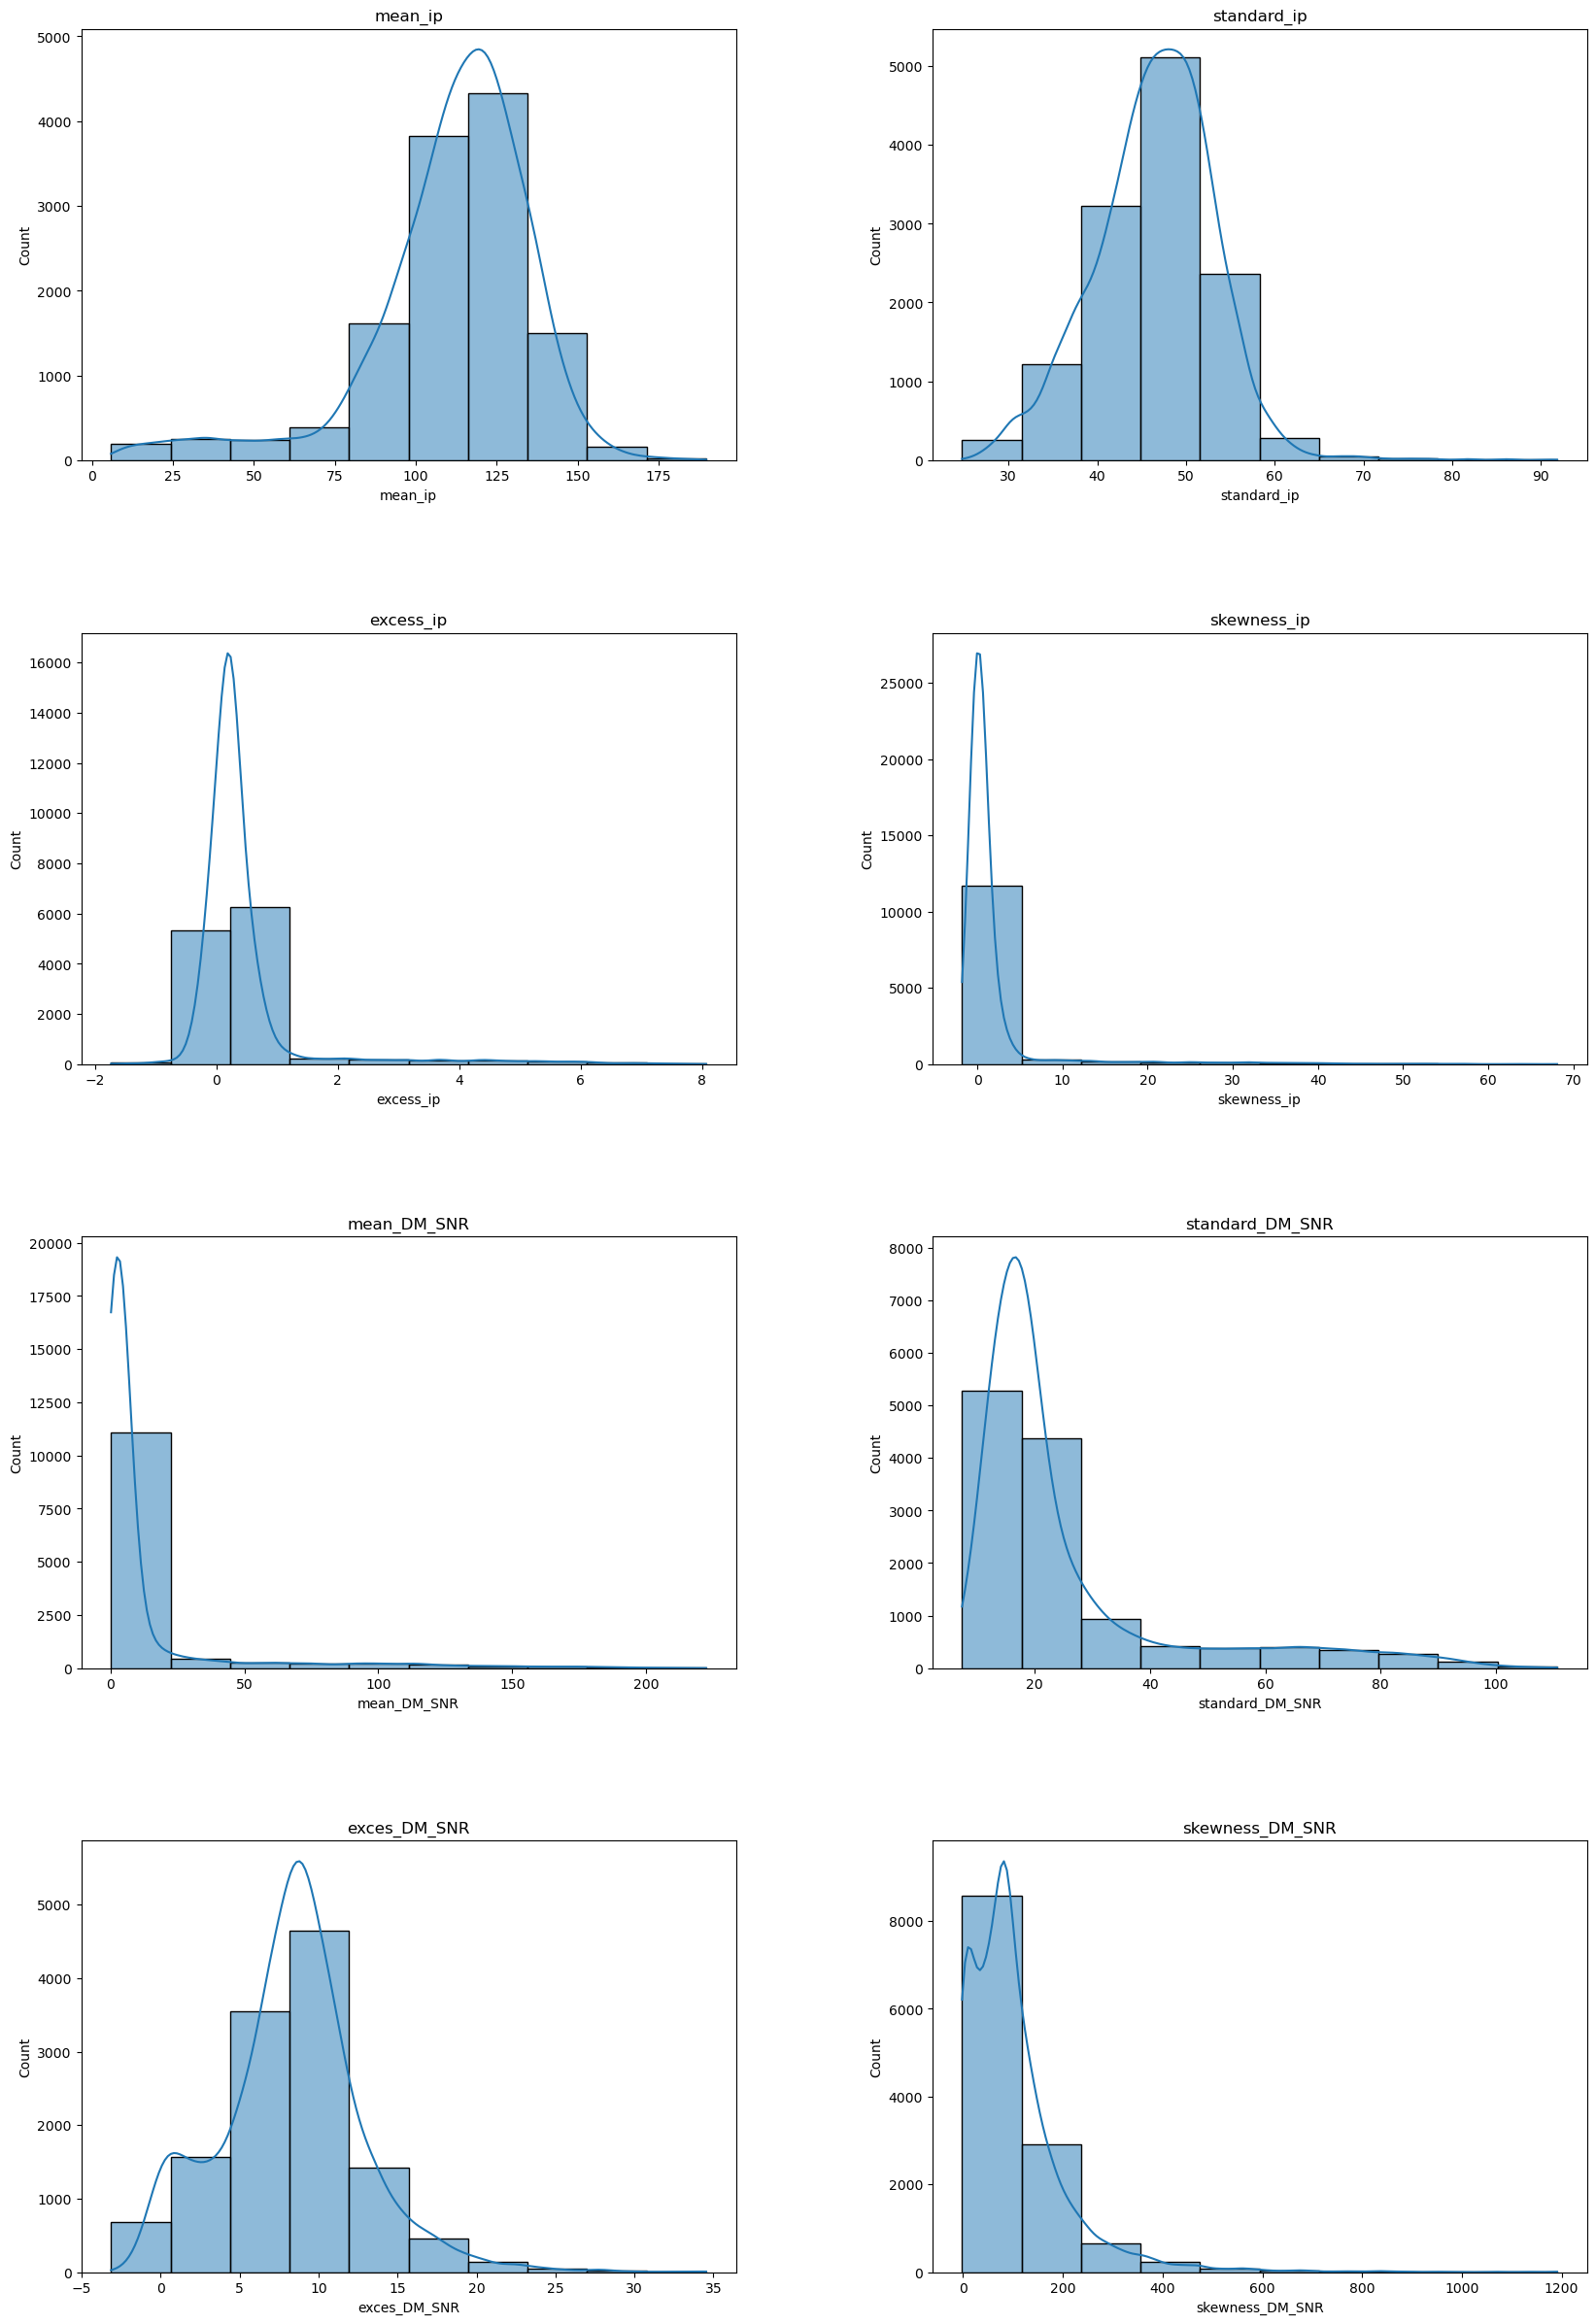

In [54]:
f,ax=plt.subplots(4,2,figsize=(20,30))

# mean_ip
sns.histplot(x='mean_ip',data=df, ax=ax[0,0],  bins=10, kde=True)
ax[0,0].set_title('mean_ip')
ax[0,0].bar_label(ax[0,0].containers[0])

# standard_ip
sns.histplot(x='standard_ip',data=df,ax=ax[0,1],  bins=10, kde=True)
ax[0,1].set_title('standard_ip')
ax[0,1].bar_label(ax[0,1].containers[0])

# excess_ip
sns.histplot(x='excess_ip',data=df, ax=ax[1,0],  bins=10, kde=True)
ax[1,0].set_title('excess_ip')
ax[1,0].bar_label(ax[1,0].containers[0])

# skewness_ip
sns.histplot(x='skewness_ip',data=df,ax=ax[1,1],  bins=10, kde=True)
ax[1,1].set_title('skewness_ip')
ax[1,1].bar_label(ax[1,1].containers[0])

# mean_DM_SNR
sns.histplot(x='mean_DM_SNR',data=df, ax=ax[2,0],  bins=10, kde=True)
ax[2,0].set_title('mean_DM_SNR')
ax[2,0].bar_label(ax[2,0].containers[0])

# standard_DM_SNR
sns.histplot(x='standard_DM_SNR', data=df, ax=ax[2,1],  bins=10, kde=True)
ax[2,1].set_title('standard_DM_SNR')
ax[2,1].bar_label(ax[2,1].containers[0])

# exces_DM_SNR
sns.histplot(x='exces_DM_SNR',data=df, ax=ax[3,0],  bins=10, kde=True)
ax[3,0].set_title('exces_DM_SNR')
ax[3,0].bar_label(ax[3,0].containers[0])

# skewness_DM_SNR
sns.histplot(x='skewness_DM_SNR', data=df, ax=ax[3,1],  bins=10, kde=True)
ax[3,1].set_title('skewness_DM_SNR')
ax[3,1].bar_label(ax[3,1].containers[0])

plt.subplots_adjust(wspace=0.3,hspace=0.4)
plt.show()

**2. Определите матрицу признаков и переменную таргета. Разделите трейновый набор трейн и тест с помощью train_test_split. Зафиксируйте размер тестовой выборки 0.2, а рэндом стэйт равный 0.** 

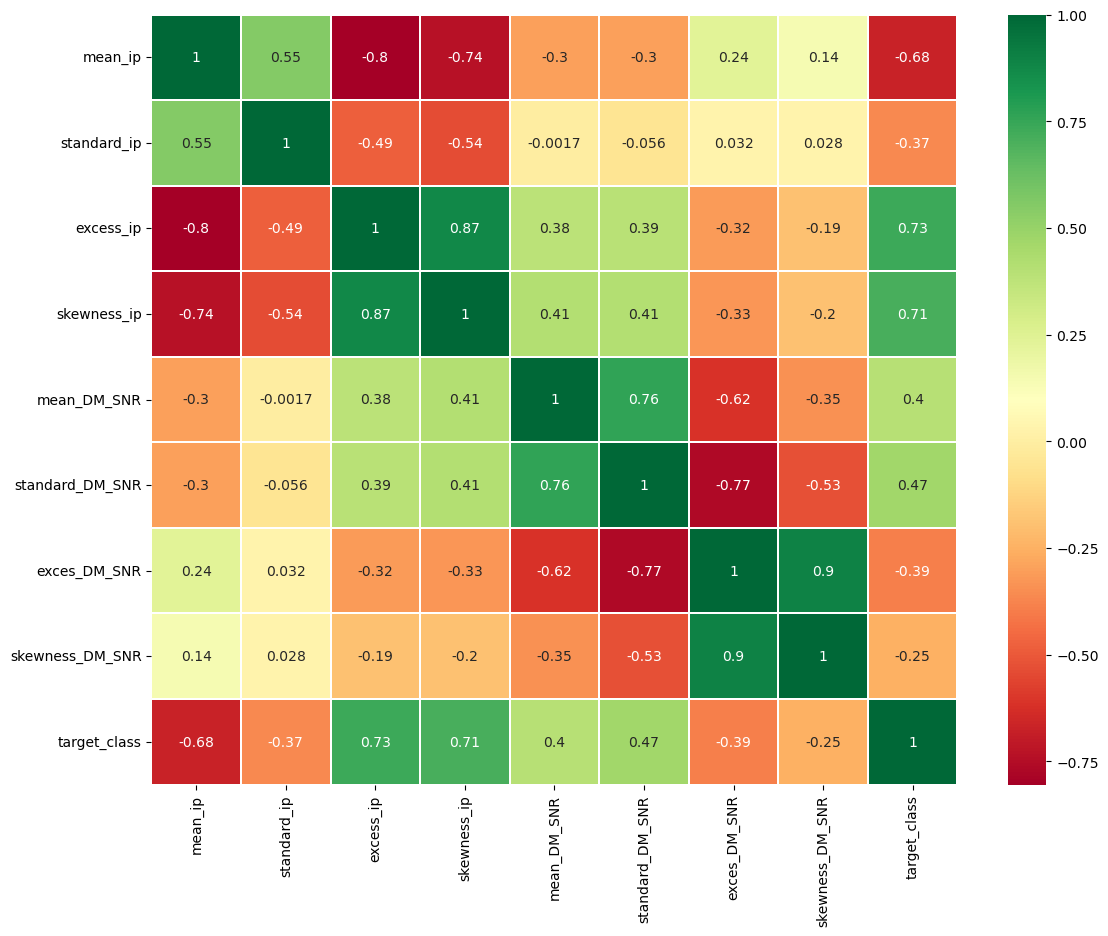

In [55]:
sns.heatmap(df.corr(), annot= True, linewidths=0.2, cmap="RdYlGn", annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(13,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [56]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
X_train.shape, X_test.shape

((10022, 8), (2506, 8))

**3. Используя StandartScaler отмасштабируйте матрицу признаков трейн и тест.**

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler().fit(X_train)

In [67]:
scaler.mean_

array([110.89807502,  46.4995205 ,   0.44905783,   1.82405059,
        12.737285  ,  25.64743835,   8.33487626, 104.39398841])

In [75]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = colu[:-1])
X_train_scaled.head()

,mean_ip,standard_ip,excess_ip,skewness_ip,mean_DM_SNR,standard_DM_SNR,exces_DM_SNR,skewness_DM_SNR
0,1.112382,-0.651835,-0.658975,-0.247974,-0.235784,-0.071890,-0.712771,-0.718071
1,-0.826265,-1.104939,-0.003075,-0.041667,-0.404186,-0.820964,2.158752,2.679825
2,-0.464730,0.245287,-0.033735,-0.222887,-0.379589,-0.396942,0.851468,0.413548
3,0.801547,0.550944,-0.437243,-0.274269,-0.422521,-0.967960,5.769814,10.363961
4,-0.404374,-0.042093,0.119043,-0.208137,-0.327771,-0.366073,-0.052073,-0.254513


In [76]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = colu[:-1])
X_test_scaled.head()

,mean_ip,standard_ip,excess_ip,skewness_ip,mean_DM_SNR,standard_DM_SNR,exces_DM_SNR,skewness_DM_SNR
0,0.229066,0.611600,-0.369486,-0.353663,-0.393975,-0.835792,2.002268,2.726866
1,0.503688,-0.035696,-0.214334,-0.262586,-0.223683,0.109462,-0.708804,-0.733644
2,1.368896,3.263565,-0.224276,-0.415569,3.498131,3.046380,-1.969059,-0.202849
3,-2.006533,3.009058,-0.224276,-0.096089,3.254160,1.907807,-1.704208,-1.004172
4,0.336803,-0.191015,0.102202,-0.258889,-0.352960,-0.430080,0.266423,-0.015400


**4. Обучите SVM Classifier на данных используя GridSearchCV: Попробуйте разные значения С, типа ядер, а так же значение гамма для rbf ядра. Подберите правильную метрику для оценки качества алгоритма. Убедитесь, что значения на тестровой и трейновой выборке сопоставимы и модель не переобучилась.**

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(SVC(), param_grid)

In [85]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [86]:
grid.best_params_

{'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}

In [87]:
grid.score(X_train_scaled, y_train)

0.9781480742366793

In [88]:
grid.score(X_test_scaled, y_test)

0.9792498004788508

In [95]:
X_train_predicted_SVC = grid.predict(X_train_scaled)
X_test_predicted_SVC = grid.predict(X_test_scaled)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [97]:
mean_absolute_error(X_train_predicted_SVC, y_train), mean_squared_error(X_train_predicted_SVC, y_train)

(0.021851925763320696, 0.021851925763320696)

In [99]:
mean_absolute_error(X_test_predicted_SVC, y_test), mean_squared_error(X_test_predicted_SVC, y_test)

(0.020750199521149242, 0.020750199521149242)

In [122]:
from sklearn.metrics import f1_score
f1_score(X_test_predicted_SVC, y_test)

0.8719211822660099

**5. Постройте confusion_matrix и classification report.**

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_test_predicted_SVC))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.96      0.80      0.87       221

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



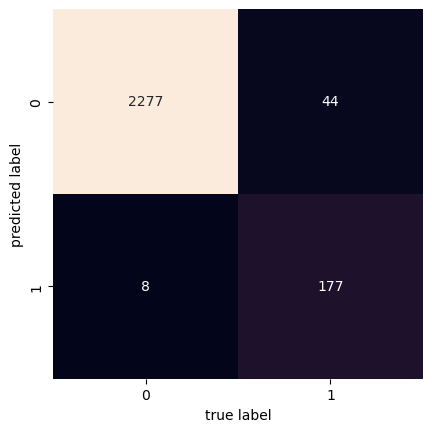

In [101]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, X_test_predicted_SVC)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

**6. Обучите Decision tree classifier на тех же данных, используя GridSearchCV подберите гиперпараметры для модели. Используйте ту же метрику, что и в задаче с SVM. Убедитесь, что алгоритм не переобучился**

In [104]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 3, 5, 10, 100], 'random_state': [0, 1, 5, 10]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree)

In [105]:
grid_tree.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 10, 100],
                         'random_state': [0, 1, 5, 10]})

In [106]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'random_state': 0}

In [107]:
grid_tree.score(X_train_scaled, y_train)

0.9811414887248054

In [119]:
grid_tree.score(X_test_scaled, y_test)

0.9760574620909817

In [109]:
X_train_predicted_tree = grid.predict(X_train_scaled)
X_test_predicted_tree = grid.predict(X_test_scaled)

In [121]:
mean_absolute_error(X_train_predicted_tree, y_train), mean_squared_error(X_train_predicted_tree, y_train)

(0.021851925763320696, 0.021851925763320696)

In [120]:
mean_absolute_error(X_test_predicted_tree, y_test), mean_squared_error(X_test_predicted_tree, y_test)

(0.020750199521149242, 0.020750199521149242)

In [123]:
f1_score(X_test_predicted_tree, y_test)

0.8719211822660099

**7. Постройте confusion_matrix и classification report.**

In [117]:
print(classification_report(y_test, X_test_predicted_tree))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.96      0.80      0.87       221

    accuracy                           0.98      2506
   macro avg       0.97      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



Text(113.9222222222222, 0.5, 'predicted label')

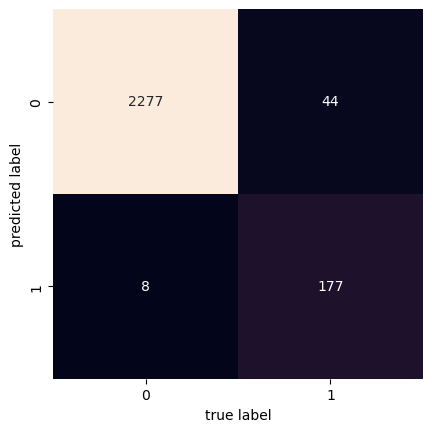

In [118]:
mat = confusion_matrix(y_test, X_test_predicted_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

**8. Напишите выводы по качеству моделей.**

In [127]:
result = pd.DataFrame({'SVC':[0.9792498004788508, 0.020750199521149242, 0.020750199521149242, 0.8719211822660099 ],
                      'DecisionTreeClassifier': [0.9760574620909817, 0.020750199521149242, 0.020750199521149242, 0.8719211822660099]}, 
                      index = ['Accuracy', 'MAE', 'MSE', 'F1-score'] )

Полученные результаты в процессе обучения через SVC и DecisionTreeClassifier являются сопоставимыми.<br>
Принципиальных различий в результате работы не замечено, как и переобучения, так что для конечного выбора можно исходить из времени, затраченного на обучение. На моем ноутбуке быстрее обучилось по DTC, поэтому я бы отдала предпочтение именно ему. Но если судить по accuracity, то выбор будет - SVC.<br>
В таблице ниже приведены величины метрик для двух алгоритмов. 

In [128]:
result

,SVC,DecisionTreeClassifier
Accuracy,0.979250,0.976057
MAE,0.020750,0.020750
MSE,0.020750,0.020750
F1-score,0.871921,0.871921
